In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add this line to import numpy


# Load the dataset from an Excel file
dataset = pd.read_excel("HousePricePrediction.xlsx", engine='openpyxl')


# Printing first 5 records of the dataset
print(dataset.head(5))

dataset.shape

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
unique_values = []
for col in object_cols:
unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1

dataset.drop(['Id'],
			axis=1,
			inplace=True)

dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())

new_dataset = dataset.dropna()
new_dataset.isnull().sum()
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


IndentationError: expected an indented block after 'for' statement on line 36 (414362842.py, line 37)

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Dataset shape: (2919, 13)


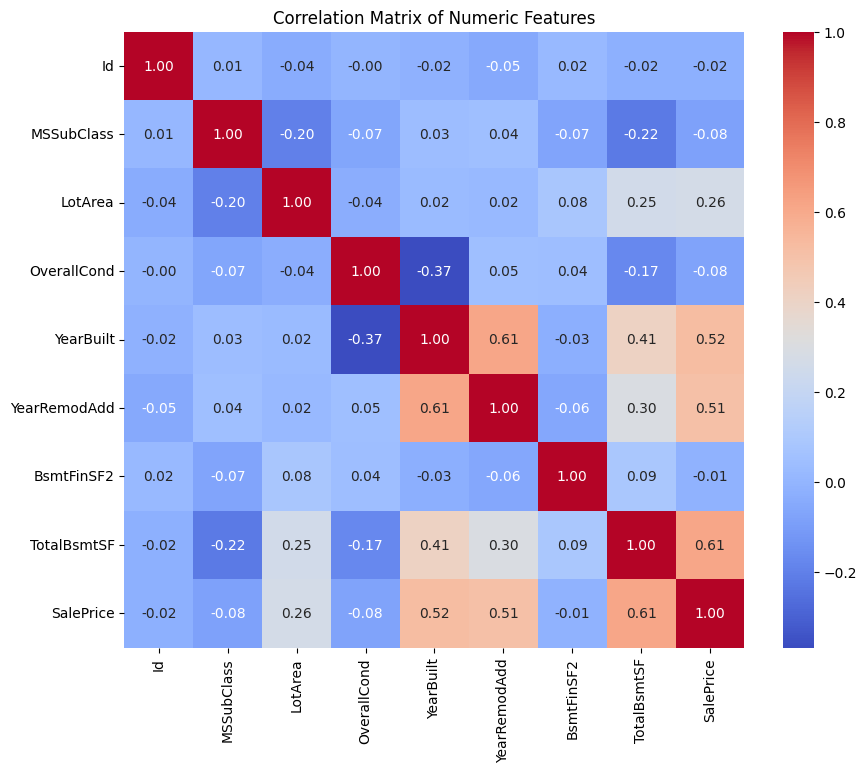

C:\Users\pc\AppData\Local\Temp\ipykernel_23496\1083978879.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=object_cols, y=unique_values, palette='viridis')


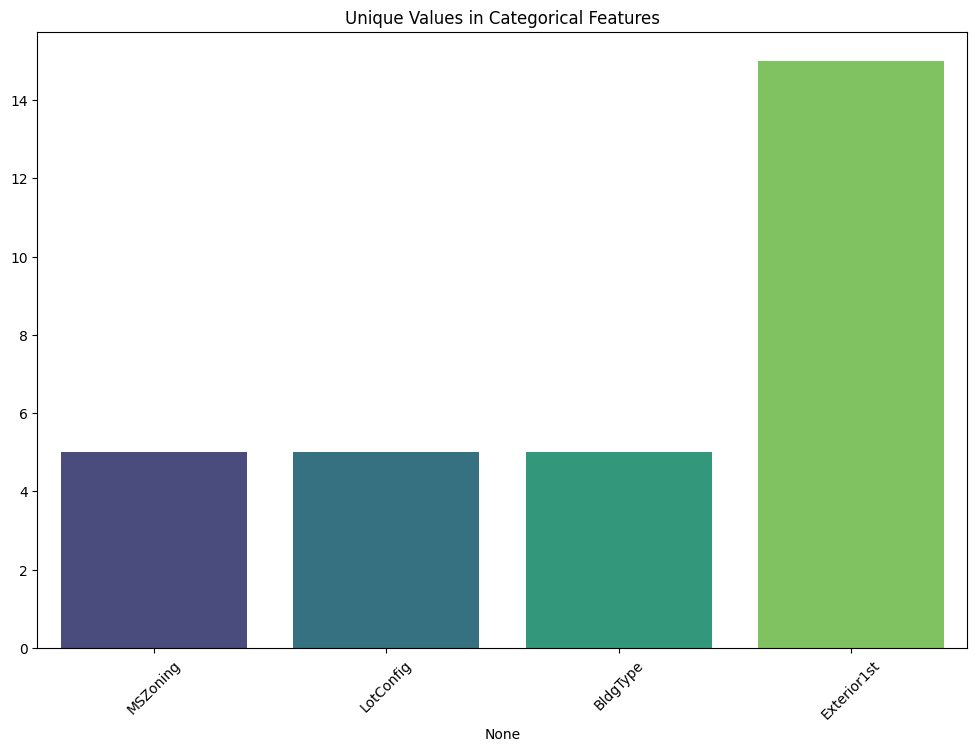

C:\Users\pc\AppData\Local\Temp\ipykernel_23496\1083978879.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette='coolwarm')
C:\Users\pc\AppData\Local\Temp\ipykernel_23496\1083978879.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette='coolwarm')
C:\Users\pc\AppData\Local\Temp\ipykernel_23496\1083978879.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette='coolwarm')
C:\Users\pc\AppData\Local\Temp\ipykernel_23496\1083978879.py:43: FutureWarning: 

Pas

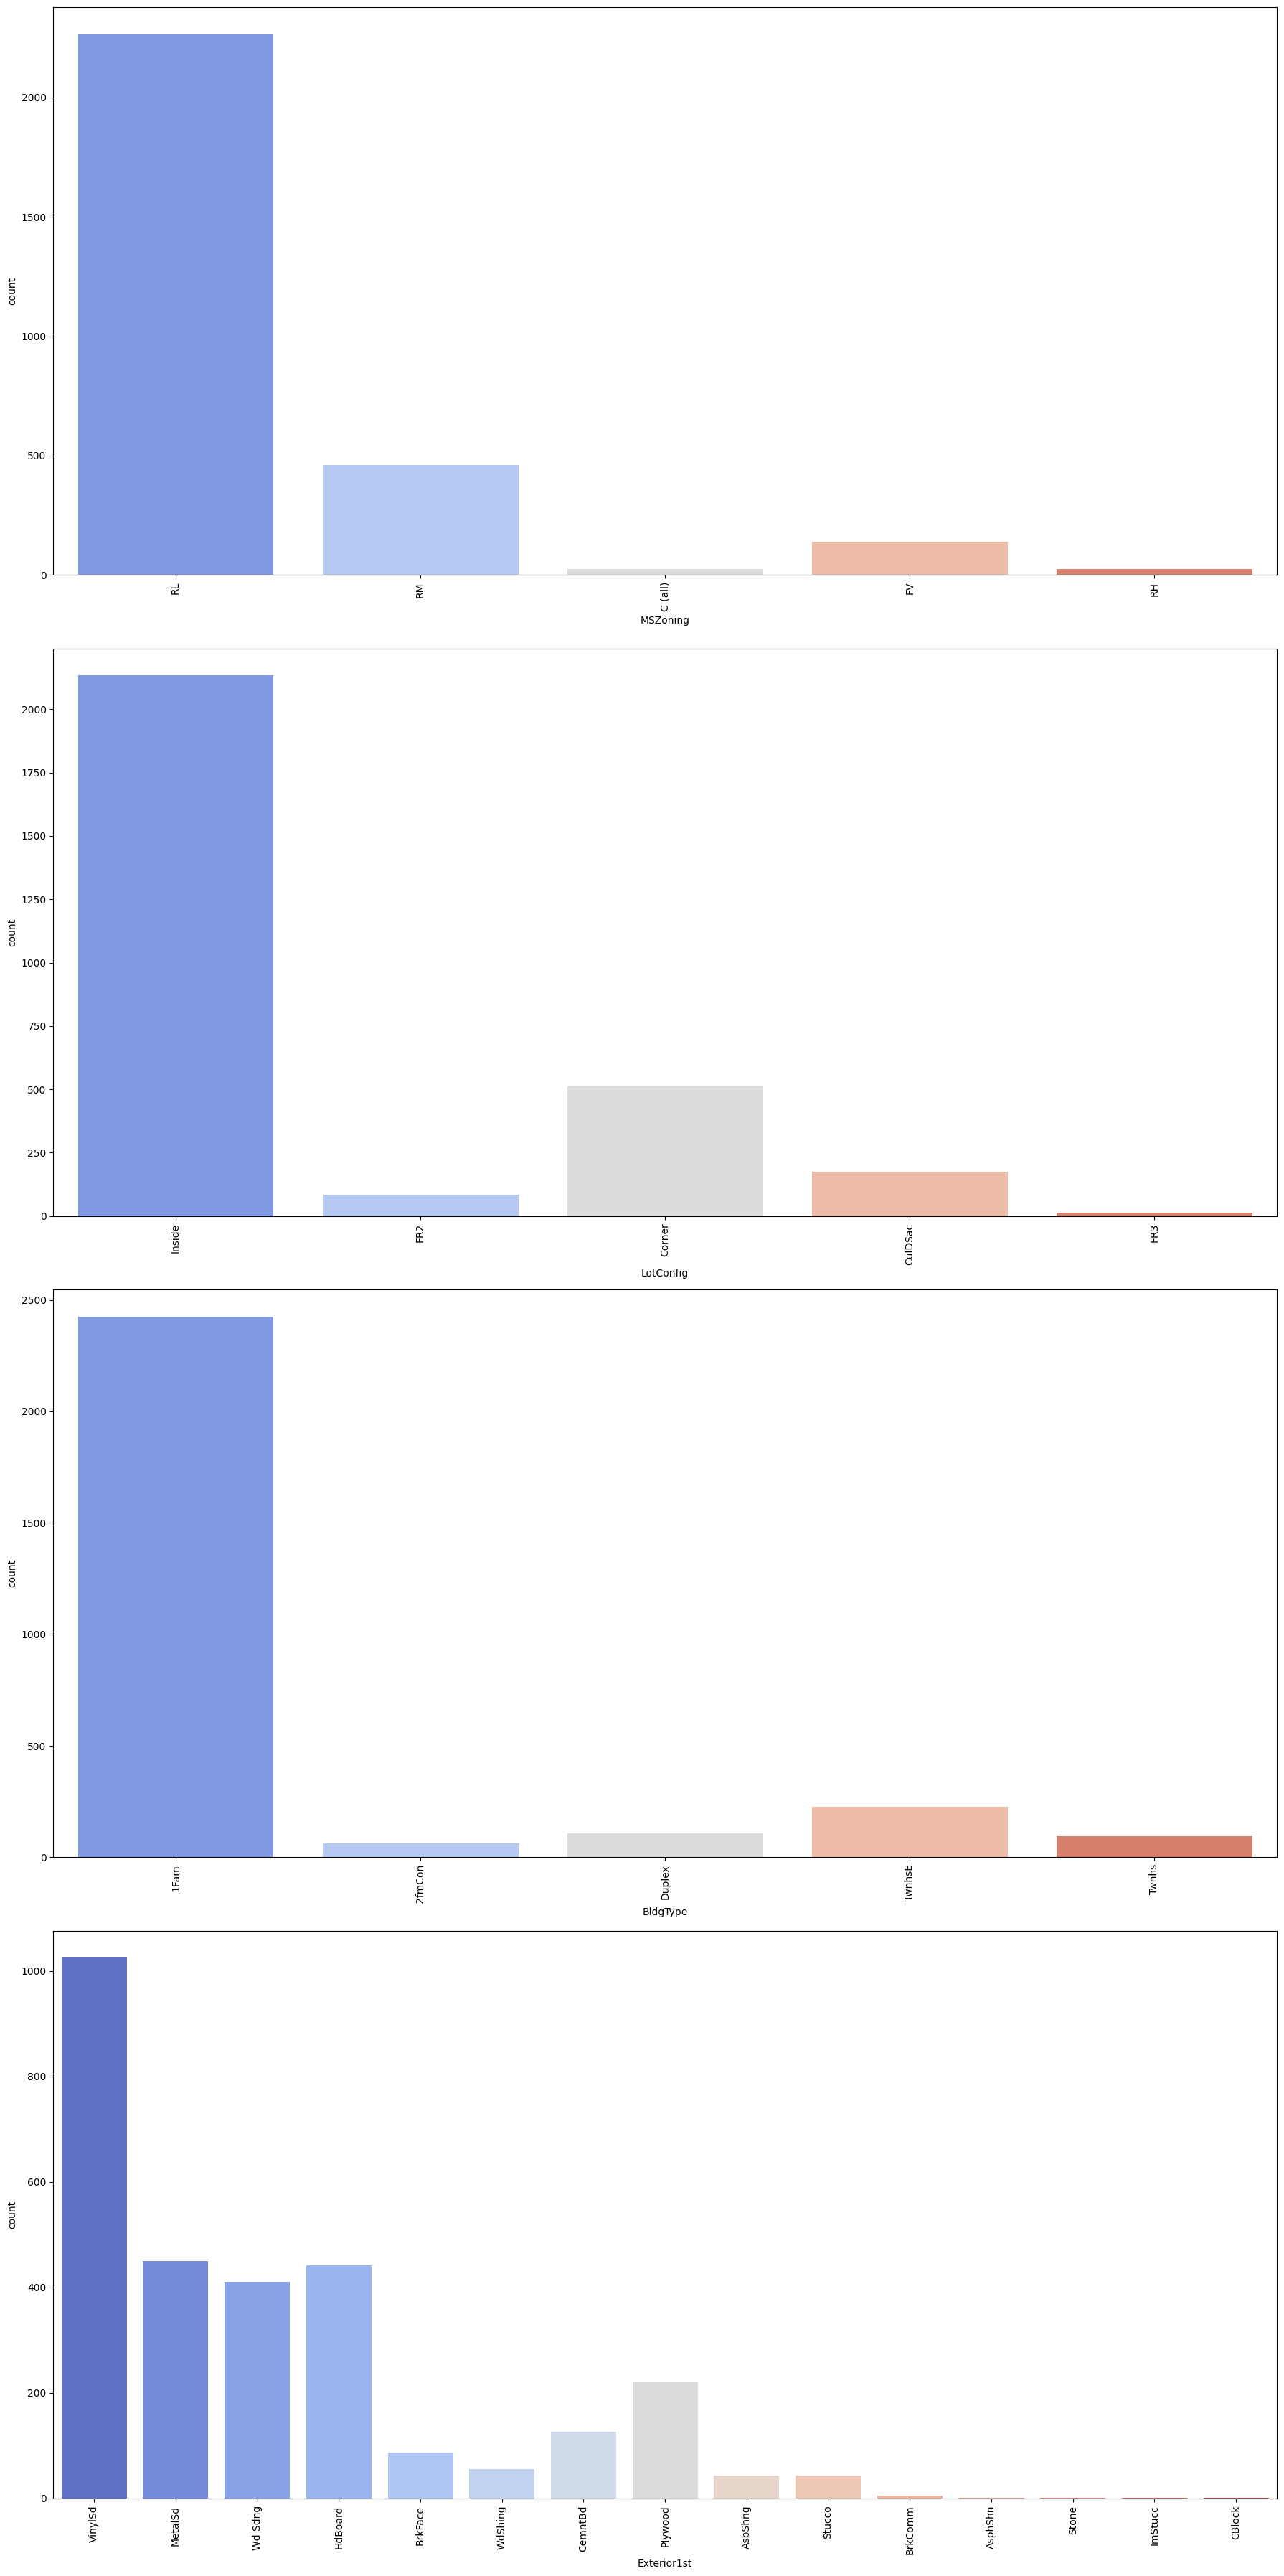


Model Performance Metrics (MAPE):
Stacking: 0.1842
Voting: 0.1846
LightGBM: 0.1898
HistGradientBoosting: 0.1901

Most Accurate Model: Stacking with a MAPE of 0.1842


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Load the dataset
dataset = pd.read_excel("HousePricePrediction.xlsx", engine='openpyxl')

# Display the dataset's structure and initial exploration
print(dataset.head(5))
print("Dataset shape:", dataset.shape)

# Correlation matrix visualization for numeric features
numeric_dataset = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Unique values of categorical features visualization
plt.figure(figsize=(12, 8))
object_cols = dataset.select_dtypes(include=['object']).columns
unique_values = [dataset[col].nunique() for col in object_cols]
sns.barplot(x=object_cols, y=unique_values, palette='viridis')
plt.title('Unique Values in Categorical Features')
plt.xticks(rotation=45)
plt.show()

# Distribution of categorical features visualization
plt.figure(figsize=(18, 36))
for index, col in enumerate(object_cols, 1):
    plt.subplot(len(object_cols), 1, index)
    sns.countplot(x=col, data=dataset, palette='coolwarm')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Preprocessing: Dropping 'Id' column and handling missing values
dataset.drop(['Id'], axis=1, inplace=True, errors='ignore')
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
new_dataset = dataset.dropna()

# One-Hot Encoding for categorical variables
OH_encoder = OneHotEncoder()
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]).toarray(), index=new_dataset.index)
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = pd.concat([new_dataset.drop(object_cols, axis=1), OH_cols], axis=1)

# Splitting the dataset into training and validation sets
X = df_final.drop('SalePrice', axis=1)
Y = df_final['SalePrice']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model Training and Predictions with verbosity adjustments
model_LGBM = LGBMRegressor(verbose=-1).fit(X_train, Y_train)  # LightGBM
predictions_LGBM = model_LGBM.predict(X_valid)

model_HGBR = HistGradientBoostingRegressor().fit(X_train, Y_train)  # HistGradientBoosting
predictions_HGBR = model_HGBR.predict(X_valid)

# Stacking Regressor setup
estimators = [
    ('rf', RandomForestRegressor(n_estimators=10)),
    ('svr', make_pipeline(StandardScaler(), SVR()))
]
model_stacking = StackingRegressor(estimators=estimators, final_estimator=Ridge()).fit(X_train, Y_train)
predictions_stacking = model_stacking.predict(X_valid)

# Voting Regressor setup
model_voting = VotingRegressor(estimators=[
    ('lgbm', LGBMRegressor(verbose=-1)),
    ('cb', CatBoostRegressor(verbose=0))
]).fit(X_train, Y_train)
predictions_voting = model_voting.predict(X_valid)

# Evaluation and Performance Metrics
performance_metrics = {
    'LightGBM': mean_absolute_percentage_error(Y_valid, predictions_LGBM),
    'HistGradientBoosting': mean_absolute_percentage_error(Y_valid, predictions_HGBR),
    'Stacking': mean_absolute_percentage_error(Y_valid, predictions_stacking),
    'Voting': mean_absolute_percentage_error(Y_valid, predictions_voting)
}

# Displaying MAPE for all models
print("\nModel Performance Metrics (MAPE):")
for model, mape in sorted(performance_metrics.items(), key=lambda x: x[1]):
    print(f"{model}: {mape:.4f}")

# Identifying the most accurate model
most_accurate_model = min(performance_metrics, key=performance_metrics.get)
print(f"\nMost Accurate Model: {most_accurate_model} with a MAPE of {performance_metrics[most_accurate_model]:.4f}")
